#### Project Purpose

Organizations keep detailed records with many attributes to describe each customer.  Characteristics like the population where the customer lives and the number of children they have could factor into their decision to terminate services with the company.  The question I would like to answer with this report is: "How can I optimize the customer data to best predict whether a customer will terminate their services?"

One goal of this analysis project is to create a list of components that contribute to at least 80% of the variability in the data. Ultimately, I would like to use this information to go back to some of the prior course tasks to see if using the transformations created using this PCA can create statistical models with higher accuracy.

#### Explanation of Method

In large datasets that contain many variables or "features", models can be affected by extra information that does not add value to the analysis technique (Wilson, n.d.).  This can happen in the case where the features are insignificant to the analysis or are highly correlated with other features.  One way to eliminate these issues is to drop those features from the dataset before creating a model, but this can result in the loss of data that might be helpful in prediction.  

Principal Component Analysis (PCA) is a method that uses feature extraction.  The algorithm performs a linear transformation on correlated variables and combines them into a new set of uncorrelated features (Loukas, 2020).  The feature combinations, or components, are ordered based on how much variability they contribute to the dataset.  The most useful components that provide the majority of the variability can be kept to create models for regression and classification, which will be free from the influence of multicollinearity (Brems, 2019).  The transformed components keep the majority of the information of the original dataset.  This can be seen in the case of image compression using PCA, where an almost exact replica of the original pictures can be seen after applying the inverse of the transformation (Boeye, n.d.).

One downside of using PCA is that the transformed components are no longer the clear distinct variables of the original dataset.  Therefore, PCA should not be used when there is a desire to keep the independent variables available for interpretation (Brems, 2019).  

#### Assumptions

One assumption of PCA is that the data has been standardized. While the variables being used in the PCA analysis are all numeric, many of them have large variations in the range of values. A variable like population can range into the thousands, while 'Yearly_equip_failure' has a maximum value of 6. Standardizing the data ensures that all features are using a similar range. This is important for PCA because it groups components to maximize the variance (Pedregosa, 2011). If the features are not scaled, PCA might incorrectly group the data causing it to underperform (Boeye, n.d.).

#### Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore') # Ignore warning messages for readability

In [2]:
# Read in data set and view head
df = pd.read_csv('churn_clean.csv')
pd.options.display.max_columns = None
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# View column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

* Numeric variables: Lat, Lng, Population, Children, Age, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Tenure, MonthlyCharge, Bandwidth_GB_Year, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8

In [5]:
# Create new dataframe for variables to be used in PCA and view head
df_PCA = df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 
            'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 
            'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]
df_PCA.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
# Scale the data
scaler = StandardScaler()
PCA_std = scaler.fit_transform(df_PCA)

In [7]:
# Convert standardized numpy array to dataframe and export to Excel

# Create an array of column names for dataframe
columns = df_PCA.columns

# Convert numpy array to dataframe
df_PCA_std = pd.DataFrame(PCA_std, columns=columns)

# Save standardized dataframe to Excel file (ref E3)
df_PCA_std.to_excel('df_PCA_std.xlsx', index = False, encoding = 'utf-8') 

In [8]:
# View standardized data
df_PCA_std.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,3.217410,-2.810432,-0.673405,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384
1,1.024691,0.431644,0.047772,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384
2,1.213570,-2.142079,-0.417238,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828
3,-1.065031,-1.746273,0.284537,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828
4,-1.724710,-0.331512,0.110549,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596


#### Principal Component Analysis

In [9]:
# Create a PCA model and fit to the data
pca = PCA()
pca.fit(PCA_std)

PCA()

In [10]:
# Display matrix of all principal components
print(pca.components_)

[[-1.11224657e-03  8.05819399e-03 -2.18128395e-03  4.12840237e-03
   6.50872306e-03  1.02244405e-03 -1.74936656e-02  8.79175823e-03
  -8.72526329e-03 -7.70545082e-03 -1.62662110e-02  9.79819920e-04
  -1.67899389e-02  4.58718711e-01  4.33833886e-01  4.00518325e-01
   1.45752051e-01 -1.75652341e-01  4.05012316e-01  3.58210511e-01
   3.08715988e-01]
 [-2.31207748e-02  9.44743876e-03 -7.70736959e-04  1.59568291e-02
   5.21341098e-04  5.80777653e-03  3.90861691e-03 -1.97411527e-02
   3.45914531e-03  1.76711247e-02  7.02098205e-01  3.98835005e-02
   7.03617405e-01  3.13345268e-02  3.86172310e-02  3.55977192e-02
  -3.98140691e-02  5.65295150e-02 -6.73644002e-03  1.73660383e-03
  -1.33498148e-02]
 [-7.37976389e-03  2.24453811e-02  1.56158359e-02  2.87838361e-02
  -2.88357024e-02  2.56219223e-02 -1.41664595e-02 -2.77271616e-03
  -1.15239627e-02  8.04308341e-03 -6.36930267e-02 -9.13849129e-03
  -6.27244201e-02  2.80923749e-01  2.81971006e-01  2.80414776e-01
  -5.68295206e-01  5.86829296e-01 -1.8

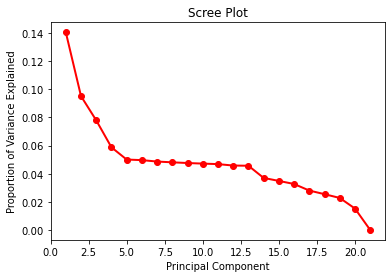

In [11]:
# Display scree plot to implement elbow rule
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

* According to the scree plot above, there is an elbow at the 6th component.  This means that the ideal number of components to select is 6.

In [12]:
# Create a PCA model with 6 components and fit to the data
pca2 = PCA(n_components = 6)
pca2.fit(PCA_std)

PCA(n_components=6)

In [13]:
# Print the variance of each component
for i in range(pca2.n_components_):
    print("Component", i, "has a variance of", round(pca2.explained_variance_[i],2))
    print("Component", i, "explains",round(pca2.explained_variance_ratio_[i]*100,2), 'percent of the variance in the data.')

Component 0 has a variance of 2.95
Component 0 explains 14.04 percent of the variance in the data.
Component 1 has a variance of 2.0
Component 1 explains 9.51 percent of the variance in the data.
Component 2 has a variance of 1.64
Component 2 explains 7.79 percent of the variance in the data.
Component 3 has a variance of 1.24
Component 3 explains 5.88 percent of the variance in the data.
Component 4 has a variance of 1.05
Component 4 explains 5.01 percent of the variance in the data.
Component 5 has a variance of 1.04
Component 5 explains 4.96 percent of the variance in the data.


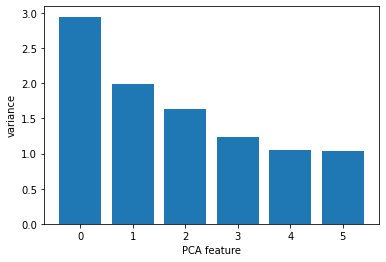

In [14]:
# Plot the explained variances
features = range(pca2.n_components_)
plt.bar(features, pca2.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [15]:
# Calculate and print the total variance captured by components
count = 0
for i in range(pca2.n_components_):
    count = count + pca2.explained_variance_ratio_[i]
print('The total variance explained by the 6 components is', round(count *100, 2), 'percent.')

The total variance explained by the 6 components is 47.19 percent.


#### Findings

In the PCA analysis described in the assignment's directions, we were to choose the number of components based on the "elbow rule".  This uses a scree plot on the PCA transformed data and looks for an "elbow" or bend where the data variability appears to level out.  In the case of my scree plot above, this occurs at component 6.  When I then performed PCA using six components, only 47% of the variance in the data could be described by the 6 components.

Since my goal was to describe at least 80% of the variance in the data, I decided to run another instance of PCA below specifying that.  Using that parameter to optimize my results left me with 13 components that describe a little over 80% of the variance.  Looking at the above scree plot, there is another elbow near there so I should have chosen a number closer to that for my initial PCA analysis.

In [16]:
# Create a comparison PCA that will keep 80% of the variance
pca3 = PCA(n_components = 0.8)
pca3.fit(PCA_std)

PCA(n_components=0.8)

In [17]:
# Print the variance of each component
for i in range(pca3.n_components_):
    print("Component", i, "has a variance of", round(pca3.explained_variance_[i],2))
    print("Component", i, "explains",round(pca3.explained_variance_ratio_[i]*100,2), 'percent of the variance in the data.')

Component 0 has a variance of 2.95
Component 0 explains 14.04 percent of the variance in the data.
Component 1 has a variance of 2.0
Component 1 explains 9.51 percent of the variance in the data.
Component 2 has a variance of 1.64
Component 2 explains 7.79 percent of the variance in the data.
Component 3 has a variance of 1.24
Component 3 explains 5.88 percent of the variance in the data.
Component 4 has a variance of 1.05
Component 4 explains 5.02 percent of the variance in the data.
Component 5 has a variance of 1.04
Component 5 explains 4.97 percent of the variance in the data.
Component 6 has a variance of 1.02
Component 6 explains 4.87 percent of the variance in the data.
Component 7 has a variance of 1.01
Component 7 explains 4.82 percent of the variance in the data.
Component 8 has a variance of 1.0
Component 8 explains 4.77 percent of the variance in the data.
Component 9 has a variance of 0.99
Component 9 explains 4.73 percent of the variance in the data.
Component 10 has a va

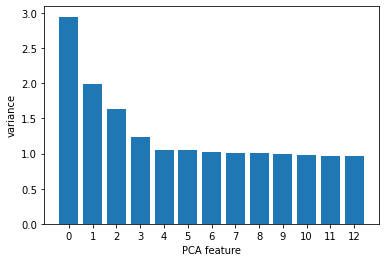

In [19]:
# Plot the explained variances
features = range(pca3.n_components_)
plt.bar(features, pca3.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [20]:
count = 0
increment = 0
for i in range(pca3.n_components_):
    count = count + pca3.explained_variance_ratio_[i]
    increment = increment + 1
print('The total variance explained by the', increment, 'components is', round(count *100, 2), 'percent.')

The total variance explained by the 13 components is 80.27 percent.


#### Sources

- Boeye, J. (n.d.). Dimensionality Reduction in Python. Retrieved February 16, 2021, from https://learn.datacamp.com/courses/dimensionality-reduction-in-python

- Brems, M. (2019, June 10). A one-stop shop for principal component analysis. Retrieved February 18, 2021, from https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

- Loukas, S. (2020, July 28). PCA clearly explained - how, when, why to use it and feature importance: A guide in Python. Retrieved February 18, 2021, from https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

- Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.

- Wilson, B. (n.d.). Unsupervised Learning in Python. Retrieved February 16, 2021, from https://learn.datacamp.com/courses/unsupervised-learning-in-python

#### Helpful Sites Used in Coding Project

1. https://campus.datacamp.com/courses/dimensionality-reduction-in-python
2. https://campus.datacamp.com/courses/unsupervised-learning-in-python/
3. https://stackoverflow.com/questions/51904126/write-a-numpy-ndarray-to-an-xlsx-spreadsheet
4. https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis